In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# 1.Import libraries

In [2]:
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.optimizers import SGD

# 2.read the data/load the dataset

In [3]:
(trainX,trainY),(testX,testY)=cifar10.load_data()

170498071/170498071 [==============================] - 17s 0us/step


In [4]:
trainX.shape,testX.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

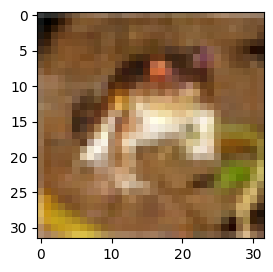

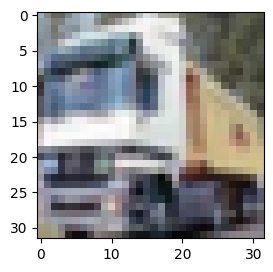

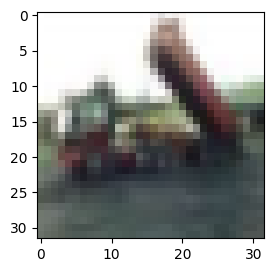

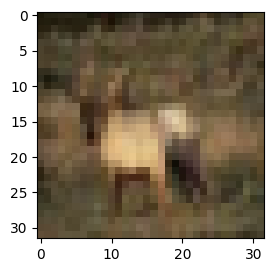

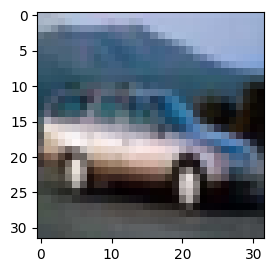

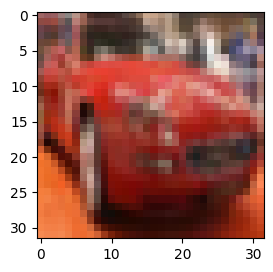

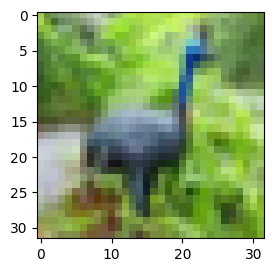

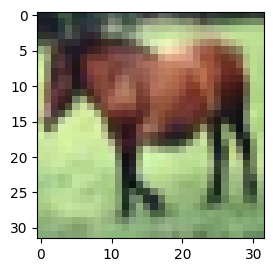

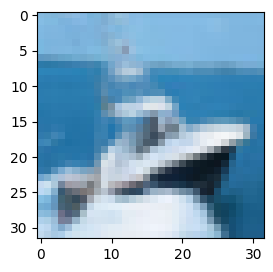

In [5]:
# plot first few images
for i in range(9):
    plt.figure(figsize=(10,10))
    #DEFINE SUBPLOT
    plt.subplot(330+1+i)
    #plot raw pixel data
    plt.imshow(trainX[i])
    # show the figure
    plt.show()

# 3. optional-data processing-data minining-data cleanig

In [6]:
# reshape dataset to have a single channel
trainX=trainX.reshape((trainX.shape[0],32,32,3))
testX=testX.reshape((testX.shape[0],32,32,3))
# one hot encode target values
trainY= to_categorical(trainY)
testY = to_categorical(testY)

In [7]:
trainY

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [8]:
# convert fromintegers to float
train_norm=trainX.astype('float32')
test_norm=testX.astype('float32')
# normalize to range 0-1
train_norm=train_norm/255.0
test_norm=test_norm/255.0

In [9]:
x_tarin,x_test,y_train,y_test=train_norm,test_norm,trainY,testY

# 6.Building and training the model

In [10]:
def define_model():
    model=Sequential()
    model.add(Flatten(input_shape=(32,32,3)))
    model.add(Dense(1024,activation='relu',kernel_initializer='he_uniform'))
    model.add(Dense(512,activation='relu',kernel_initializer='he_uniform'))
    model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
    model.add(Dense(10,activation='softmax'))
    opt = SGD(learning_rate=0.01,momentum=0.9)
    model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
    model.summary()
    return model

# define model
model=define_model()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 1024)              3146752   
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 128)               65664     
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 3,738,506
Trainable params: 3,738,506
Non-trainable params: 0
_________________________________________________________________


In [11]:
history = model.fit(x_tarin,y_train,epochs=10,batch_size=32,validation_data=(x_test,y_test),verbose=1)

Epoch 1/10
1563/1563 [==============================] - 34s 21ms/step - loss: 1.8708 - accuracy: 0.3191 - val_loss: 1.8122 - val_accuracy: 0.3572
Epoch 2/10
1563/1563 [==============================] - 33s 21ms/step - loss: 1.7010 - accuracy: 0.3874 - val_loss: 1.6308 - val_accuracy: 0.4277
Epoch 3/10
1563/1563 [==============================] - 35s 23ms/step - loss: 1.6146 - accuracy: 0.4199 - val_loss: 1.5982 - val_accuracy: 0.4251
Epoch 4/10
1563/1563 [==============================] - 32s 21ms/step - loss: 1.5551 - accuracy: 0.4405 - val_loss: 1.5246 - val_accuracy: 0.4556
Epoch 5/10
1563/1563 [==============================] - 33s 21ms/step - loss: 1.5102 - accuracy: 0.4576 - val_loss: 1.5470 - val_accuracy: 0.4519
Epoch 6/10
1563/1563 [==============================] - 32s 20ms/step - loss: 1.4676 - accuracy: 0.4717 - val_loss: 1.5320 - val_accuracy: 0.4600
Epoch 7/10
1563/1563 [==============================] - 34s 22ms/step - loss: 1.4333 - accuracy: 0.4849 - val_loss: 1.5080 -

# 7.model evaluation and evaluation matrics,plotting result

In [12]:
# evaluate model
_, acc=model.evaluate(x_test,y_test,verbose=0)
print('> %.3f' % (acc * 100.0))

> 48.140


In [13]:
scores, histories = list(),list()
# stores score
scores.append(acc)
histories.append(history)

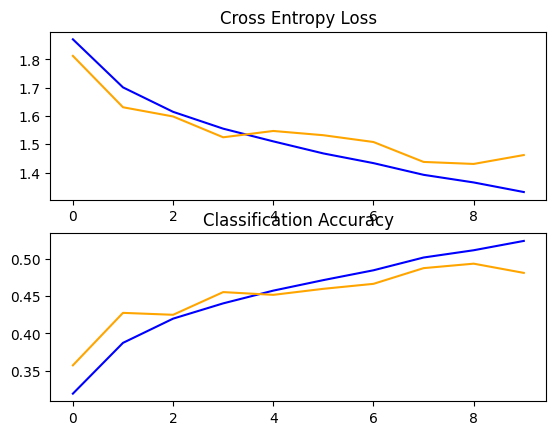

In [14]:
for i in range(len(histories)):
    # plot loss
    plt.subplot(2,1,1)
    plt.title('Cross Entropy Loss')
    plt.plot(histories[i].history['loss'],color='blue',label='train')
    plt.plot(histories[i].history['val_loss'],color='orange',label='test')
    
    #plot accuracy
    plt.subplot(2,1,2)
    plt.title('Classification Accuracy')
    plt.plot(histories[i].history['accuracy'],color='blue',label='train')
    plt.plot(histories[i].history['val_accuracy'],color='orange',label='test')
    plt.show()

# Assignment on ANN
# 1.Fashion MNIST(28*28)-only one line change
# 2.CIFAR100
# 3.Kannada mnist